In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# read the csv file
df = pd.read_csv('IMDB-Movie-Data.csv')

In [256]:
df = df.dropna()
df.shape

(838, 12)

In [257]:
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

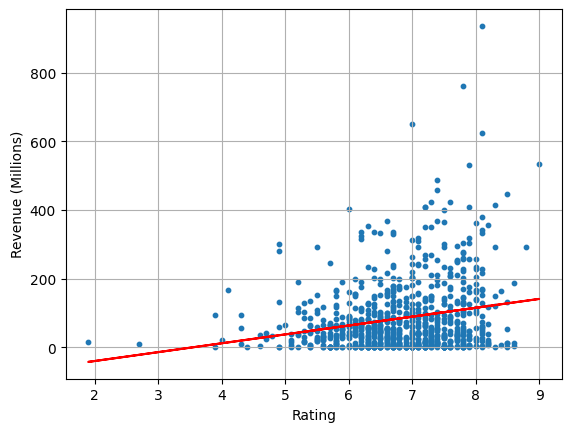

Slope coefficient: 25.852287759248938
Intercept coefficient: -91.60119811505385
R-squared: 0.04713491801764158
Correlation coefficient: 0.21710577610381881


In [258]:
X = df['Rating']
Y = df['Revenue (Millions)']

reg = LinearRegression()

reg.fit(X.values.reshape(-1, 1), Y)
y_pred = reg.predict(X.values.reshape(-1,1))

plt.scatter(X, Y, s=10)
plt.plot(X, y_pred, color='red')
plt.ylabel('Revenue (Millions)')
plt.xlabel('Rating')
plt.grid()
plt.show()

print('Slope coefficient:', reg.coef_[0])
print('Intercept coefficient:', reg.intercept_)

r_squared = reg.score(X.values.reshape(-1,1), Y)
print('R-squared:', r_squared)

corrCoefficient = df['Revenue (Millions)'].corr(df['Rating'])
print('Correlation coefficient:', corrCoefficient)


In [259]:
from collections import Counter

actors = []

# Finding the top 20 actors with the most movie in the dataset
for i in df['Actors']:
    split_actors = i.split(", ")
    for actor in split_actors:
        actors.append(actor)
        
counted_list = Counter(actors)
for actor, count in counted_list.most_common(20):
    print(f"{actor}: {count}")
    

Mark Wahlberg: 15
Hugh Jackman: 13
Brad Pitt: 13
Christian Bale: 12
Michael Fassbender: 11
Jake Gyllenhaal: 11
Tom Hardy: 11
Robert Downey Jr.: 11
Bradley Cooper: 10
Ryan Gosling: 10
Emma Stone: 10
Dwayne Johnson: 10
Anna Kendrick: 10
Seth Rogen: 10
Johnny Depp: 10
Chris Hemsworth: 10
Cate Blanchett: 10
Jennifer Lawrence: 9
Anne Hathaway: 9
Chris Evans: 9


In [260]:
df2 = df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [261]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()


df2['Genre']= label_encoder.fit_transform(df2['Genre'])
df2['Director']= label_encoder.fit_transform(df2['Director'])
df2['Title']= label_encoder.fit_transform(df2['Title'])
df2.drop('Description', axis=1, inplace=True)
df2.drop('Actors', axis=1, inplace=True)
df2.drop('Votes', axis=1, inplace=True)
df2.drop('Rank', axis=1, inplace=True)

In [266]:
from sklearn.ensemble import RandomForestRegressor

X = df2.drop('Revenue (Millions)', axis=1)
y = df2['Revenue (Millions)']

# Fit a random forest classifier
rfc = RandomForestRegressor(n_estimators=50, random_state=42)
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

Title: 0.08142511765890369
Genre: 0.3362252996800833
Director: 0.09573622158892058
Year: 0.056084960345718055
Runtime (Minutes): 0.19399929940572821
Rating: 0.11152546528831113
Metascore: 0.12500363603233505
